
<font size="5">This notebook presents some analysis and results using Football Tracking and Event data provided by Metrica Sports</font>.

Furthermore, I present my own solutions to the challenges proposed by Laurie Shaw in https://www.youtube.com/watch?v=VX3T-4lB2o0.

As basis, I adapted the base code from https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking. The data was extracted from https://github.com/metrica-sports/sample-data.



In [88]:
import LaurieOnTracking_SourceCode.Metrica_IO as mio
import LaurieOnTracking_SourceCode.Metrica_Viz as mviz
import LaurieOnTracking_SourceCode.Metrica_Velocities as mvel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [89]:


DATADIR = 'metrica_sample_data/data'
game_id = 2 # let's look at sample match 2

# EVENT DATA
events = mio.read_event_data(DATADIR,game_id)

events = mio.to_metric_coordinates(events)

print("EVENTS data:")
display(events.head())



# TRACKING DATA
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')


# Convert positions from metrica units to meters (note change in Metrica's coordinate system since the last lesson)
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)


# reverse direction of play in the second half so that home team is always attacking from right->left
tracking_home, tracking_away, events = mio.to_single_playing_direction(tracking_home,tracking_away,events)


print("TRACKING home team data:")
display(tracking_home.head())

print("TRACKING away team data:")
display(tracking_away.head())


EVENTS data:


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


Reading team: home
Reading team: away
TRACKING home team data:


,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


TRACKING away team data:


,Period,Time [s],Away_25_x,Away_25_y,Away_15_x,Away_15_y,Away_16_x,Away_16_y,Away_17_x,Away_17_y,...,Away_22_x,Away_22_y,Away_23_x,Away_23_y,Away_24_x,Away_24_y,Away_26_x,Away_26_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
2,1,0.08,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
3,1,0.12,-51.70892,-1.19884,-18.13554,-21.65528,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
4,1,0.16,-51.70892,-1.19884,-18.19384,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN
5,1,0.20,-51.70892,-1.19884,-18.25002,-21.65596,-20.42196,-3.52376,-18.8309,7.51128,...,-0.11766,35.53884,0.18762,-0.0986,-0.51198,9.36088,NaN,NaN,NaN,NaN


In [90]:
tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.54860,18.81712,4.89396,21.07492,-3.81208,...,0.20564,-7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141152,2,5646.08,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,...,NaN,NaN,9.71278,-24.17468,-1.09392,30.29672,23.36028,-9.04400,NaN,NaN
141153,2,5646.12,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,...,NaN,NaN,9.71278,-24.17468,-1.09286,30.34568,23.31046,-9.03176,NaN,NaN
141154,2,5646.16,46.3379,0.84524,12.19106,-23.55792,29.08852,-5.87860,24.22948,-12.09788,...,NaN,NaN,9.71278,-24.17468,-1.09074,30.40348,23.28714,-9.02632,NaN,NaN


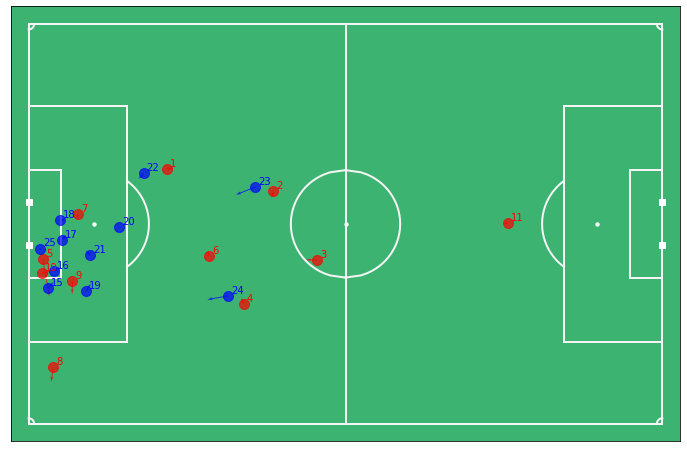

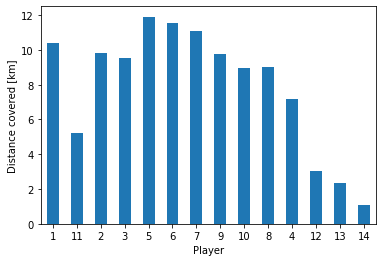

In [94]:
#adapted from https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking/blob/master/Tutorial2_DelvingDeeper.py

# COMPUTE VELOCITIES VECTORS
tracking_home = mvel.calc_player_velocities(tracking_home,smoothing=True)
tracking_away = mvel.calc_player_velocities(tracking_away,smoothing=True)

# plot a random frame, plotting the player velocities using quivers
mviz.plot_frame( tracking_home.loc[10000], tracking_away.loc[10000], include_player_velocities=True, annotate=True)


# Create a Physical summary dataframe for home players
home_players = np.unique( [ c.split('_')[1] for c in tracking_home.columns if c[:4] == 'Home' ] )
home_summary = pd.DataFrame(index=home_players)


# CALCULATE MINUTES PLAYED FOR EACH PLAYER
minutes = []
for player in home_players:
    # search for first and last frames that we have a position observation for each player (when a player is not on the pitch positions are NaN)
    column = 'Home_' + player + '_x' # use player x-position coordinate
    player_minutes = ( tracking_home[column].last_valid_index() - tracking_home[column].first_valid_index() + 1 ) / 25 / 60. # convert to minutes
    minutes.append( player_minutes )
home_summary['Minutes Played'] = minutes
home_summary = home_summary.sort_values(['Minutes Played'], ascending=False)


# CALCULATE TOTAL DISTANCE COVERED FOR EACH PLAYER
distance = []
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    player_distance = tracking_home[column].sum()/25./1000 # this is the sum of the distance travelled from one observation to the next (1/25 = 40ms) in km.
    distance.append( player_distance )
home_summary['Distance [km]'] = distance

# make a simple bar chart of distance covered for each player
plt.subplots()
ax = home_summary['Distance [km]'].plot.bar(rot=0)
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [km]')
plt.show()

In [92]:
#adapted from https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking/blob/master/Tutorial2_DelvingDeeper.py

# now calculate distance covered while: walking, joggings, running, sprinting
walking = []
jogging = []
running = []
sprinting = []
for player in home_summary.index:
    column = 'Home_' + player + '_speed'
    # walking (less than 2 m/s)
    player_distance = tracking_home.loc[tracking_home[column] < 2, column].sum()/25./1000
    walking.append( player_distance )
    # jogging (between 2 and 4 m/s)
    player_distance = tracking_home.loc[ (tracking_home[column] >= 2) & (tracking_home[column] < 4), column].sum()/25./1000
    jogging.append( player_distance )
    # running (between 4 and 7 m/s)
    player_distance = tracking_home.loc[ (tracking_home[column] >= 4) & (tracking_home[column] < 7), column].sum()/25./1000
    running.append( player_distance )
    # sprinting (greater than 7 m/s)
    player_distance = tracking_home.loc[ tracking_home[column] >= 7, column].sum()/25./1000
    sprinting.append( player_distance )
    
home_summary['Walking [km]'] = walking
home_summary['Jogging [km]'] = jogging
home_summary['Running [km]'] = running
home_summary['Sprinting [km]'] = sprinting

display(home_summary)

,Minutes Played,Distance [km],Walking [km],Jogging [km],Running [km],Sprinting [km]
1,94.104000,10.369966,3.701953,4.436083,2.149219,0.082712
11,94.104000,5.203820,4.394682,0.777765,0.029655,0.001718
2,94.104000,9.845300,4.085937,4.066061,1.612491,0.080811
3,94.104000,9.546312,4.178461,3.832849,1.382836,0.152166
5,94.104000,11.909182,3.583949,4.652462,3.519102,0.153669
6,94.104000,11.535969,3.385553,5.145440,2.829522,0.175454
7,94.104000,11.068739,3.606788,4.956883,2.324597,0.180470
9,94.104000,9.765283,4.428139,3.322470,1.863521,0.151153
10,83.825333,8.959440,3.858442,3.430553,1.404684,0.265760
8,70.740667,9.012902,2.604774,4.133859,2.183218,0.091051


**Problem 1: Estimate the top speed of each player**

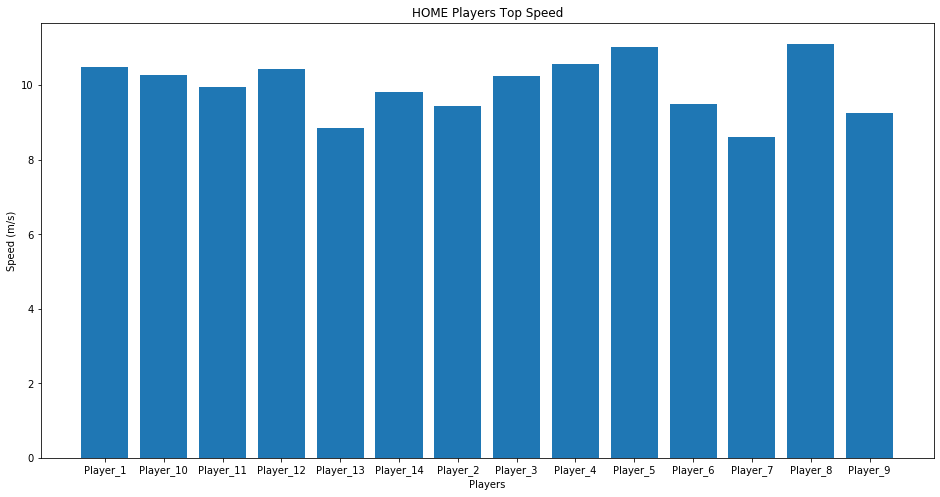

In [95]:

def get_max_speeds(df):
    top_speeds = {}

    v_columns = [i for i in df.columns if '_speed' in i]

    for i in v_columns:
        p = i.split('_')[1]

        #max_ind = tracking_home[i].idxmax()    
        top_speeds['Player_' + p] = df[i].max()
    return top_speeds
    
    
home_top_speeds = get_max_speed(tracking_home)
away_top_speeds = get_max_speed(tracking_away)

plt.figure(figsize = (16, 8))
plt.bar(home_top_speeds.keys(), home_top_speeds.values())
plt.title('HOME Players Top Speed')
plt.ylabel('Speed (m/s)')
plt.xlabel('Players')
plt.show()

**Problem 2: Measure player accelaration from the tracking data and estimate the maximum rate of acceleration for each player**

In [96]:
def compute_accelaration(df):

    # Get the player ids
    v_columns = [i for i in df.columns if '_speed' in i]

    # Calculate the timestep from one frame to the next. Should always be 0.04 within the same half
    dt = df['Time [s]'].diff()
    

    for c in v_columns:
        player = '_'.join(c.split('_')[:2])
        
        ax = df[player+"_vx"].diff() / dt
        ay = df[player+"_vy"].diff() / dt
        
        # put player speed in x,y direction, and total speed back in the data frame
        df[player + "_ax"] = ax
        df[player + "_ay"] = ay
        df[player + "_acc"] = np.sqrt( ax**2 + ay**2 )

    return df


tracking_home = compute_accelaration(tracking_home.copy())
tracking_home.head()

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_6_acc,Home_7_ax,Home_7_ay,Home_7_acc,Home_8_ax,Home_8_ay,Home_8_acc,Home_9_ax,Home_9_ay,Home_9_acc
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.9315,-0.28084,15.70072,14.5486,18.81712,4.89396,21.07492,-3.81208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


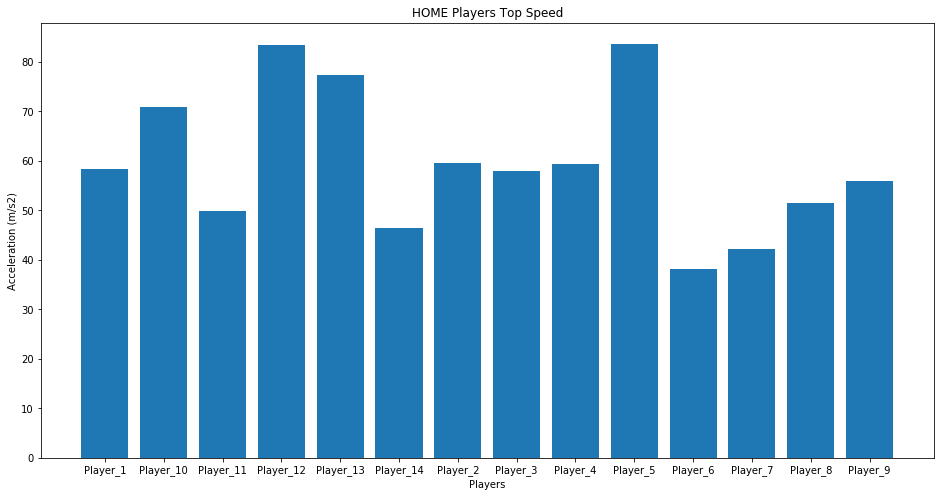

In [97]:
def get_max_acc(df):
    top_acc = {}

    v_columns = [i for i in df.columns if '_acc' in i]

    for i in v_columns:
        p = i.split('_')[1]

        #max_ind = tracking_home[i].idxmax()    
        top_acc['Player_' + p] = df[i].max()
    return top_acc
    
    
home_top_acc = get_max_acc(tracking_home)
#away_top_acc = get_max_acc(tracking_away)

plt.figure(figsize = (16, 8))
plt.bar(home_top_acc.keys(), home_top_acc.values())
plt.title('HOME Players Top Acceleration')
plt.ylabel('Acceleration (m/s2)')
plt.xlabel('Players')
plt.show()